In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd

from keras.datasets import cifar10
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

In [3]:
x_train.shape , x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


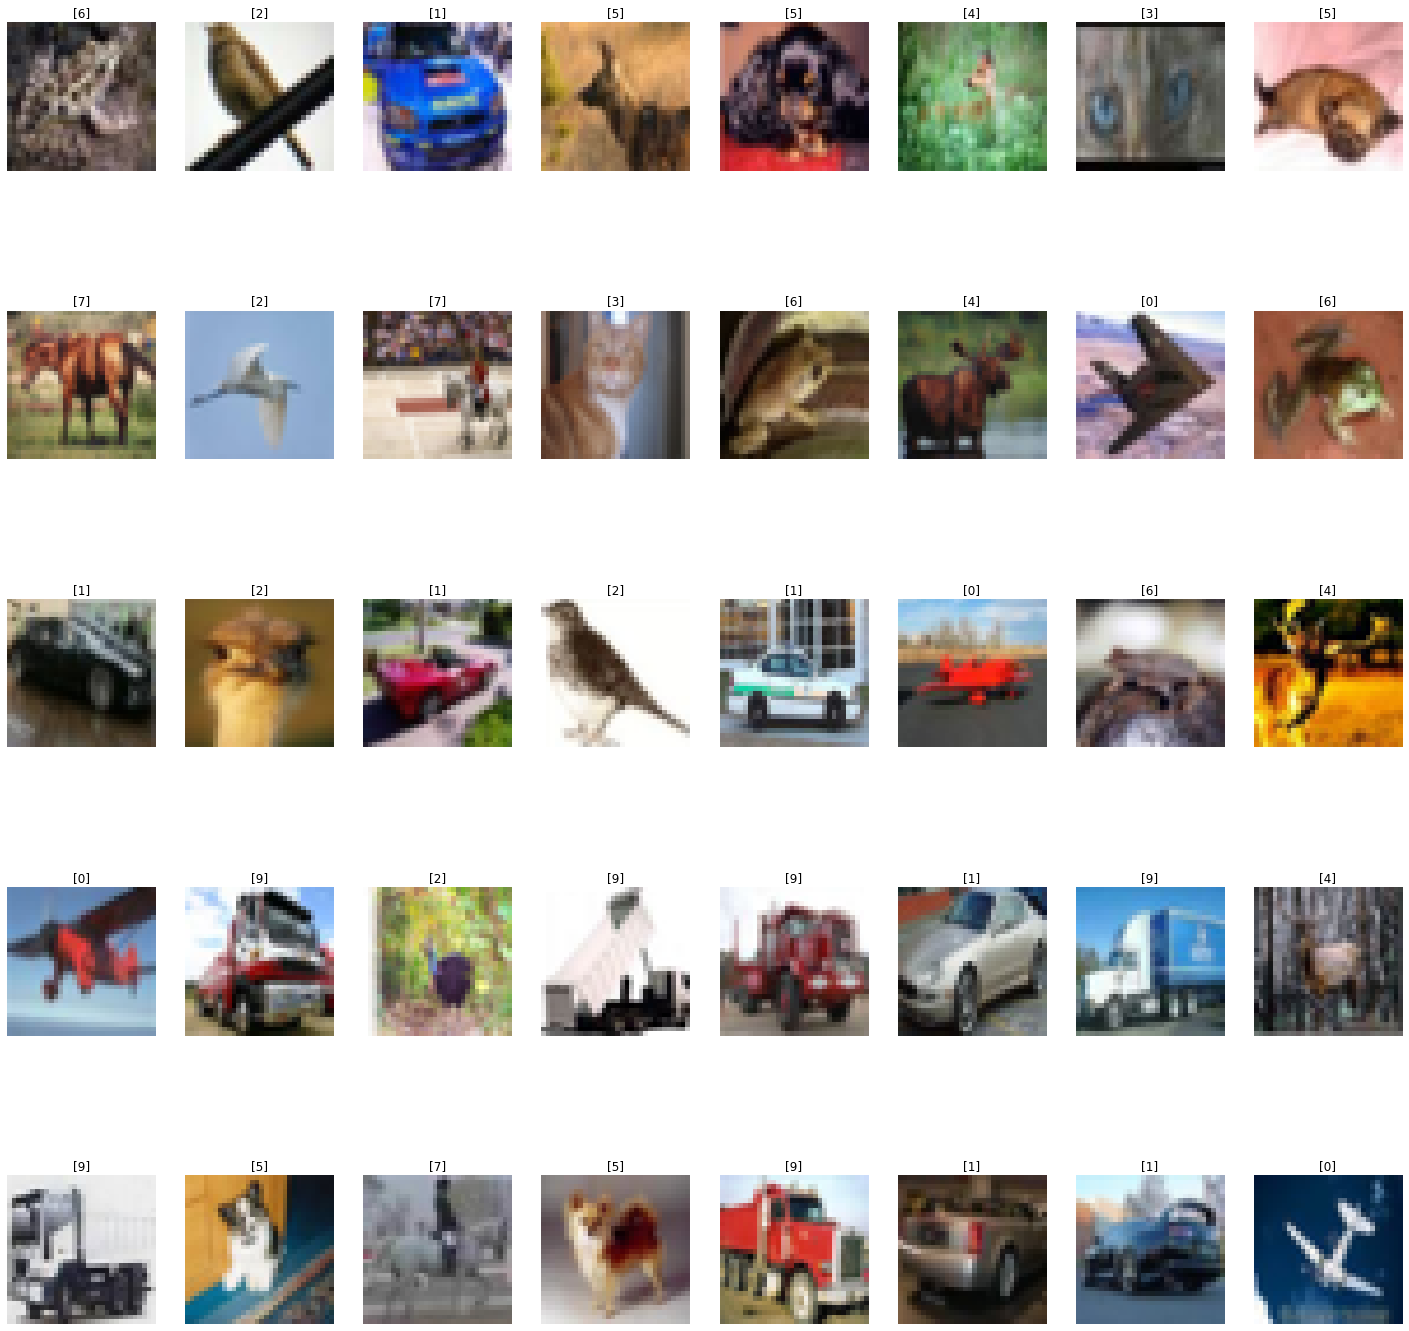

In [5]:
#visualize data
import random
number_of_images = 40
f, axarr = plt.subplots(5,number_of_images//5)
f.set_figheight(25)
f.set_figwidth(25)
plt.subplots_adjust(hspace=0.4)
random.seed()
for i in range(number_of_images): 
  i+=1
  randomize = random.randint(0,50000//number_of_images)
  axarr[(i-1)%5,(i-1)//5].axis('off')
  axarr[(i-1)%5,(i-1)//5].set_title(y_train[i*randomize])
  axarr[(i-1)%5,(i-1)//5].imshow(x_train[randomize*i])



In [6]:
#$data preperation


#normalize


x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') /255
number_of_categories = 10


In [24]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
from tensorflow import keras
y_train = keras.utils.to_categorical(y_train,10)

In [9]:
y_test =keras.utils.to_categorical(y_test,10)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
Input_shape =  x_train.shape[1:]
Input_shape

(32, 32, 3)

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D , Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard, EarlyStopping


In [27]:
#create model
cnn_model = Sequential()
cnn_model.add(Conv2D(16, kernel_size=(3,3),activation='relu', input_shape=Input_shape, name='conv1'))
cnn_model.add(Conv2D(16, kernel_size=(3,3),  activation='relu', name='conv2'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))
cnn_model.add(Conv2D(32, kernel_size=(3,3),activation='relu', name='conv3'))
cnn_model.add(Conv2D(32, kernel_size=(3,3),  activation='relu', name='conv4'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))
cnn_model.add(Flatten())
cnn_model.add(Dense(32,activation='relu'))
cnn_model.add(Dense(10,activation='softmax'))


In [28]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 30, 30, 16)        448       
_________________________________________________________________
conv2 (Conv2D)               (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 12, 12, 32)        4640      
_________________________________________________________________
conv4 (Conv2D)               (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)         

In [31]:
cnn_model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
es = EarlyStopping(patience=3,restore_best_weights=True)

In [34]:
history = cnn_model.fit(x_train,y_train,batch_size=64,epochs=20,shuffle=True,validation_split=0.2,callbacks=es,verbose=1)

Epoch 1/20
625/625 [==============================] - 51s 81ms/step - loss: 0.8336 - accuracy: 0.7060 - val_loss: 0.7877 - val_accuracy: 0.7215
Epoch 2/20
625/625 [==============================] - 48s 77ms/step - loss: 0.8295 - accuracy: 0.7092 - val_loss: 0.7676 - val_accuracy: 0.7319
Epoch 3/20
625/625 [==============================] - 48s 77ms/step - loss: 0.8218 - accuracy: 0.7066 - val_loss: 0.7791 - val_accuracy: 0.7278
Epoch 4/20
625/625 [==============================] - 50s 80ms/step - loss: 0.8106 - accuracy: 0.7144 - val_loss: 0.7675 - val_accuracy: 0.7341
Epoch 5/20
625/625 [==============================] - 49s 78ms/step - loss: 0.8036 - accuracy: 0.7167 - val_loss: 0.7624 - val_accuracy: 0.7379
Epoch 6/20
625/625 [==============================] - 49s 78ms/step - loss: 0.7997 - accuracy: 0.7176 - val_loss: 0.7482 - val_accuracy: 0.7387
Epoch 7/20
625/625 [==============================] - 48s 77ms/step - loss: 0.7992 - accuracy: 0.7189 - val_loss: 0.7459 - val_accuracy:

In [37]:
evaluation = cnn_model.evaluate(x_test,y_test)
print(evaluation)

313/313 [==============================] - 4s 11ms/step - loss: 0.7529 - accuracy: 0.7382
[0.7528796195983887, 0.7382000088691711]


In [48]:
predicted_classes = cnn_model.predict(x_test).argmax(1)
predicted_classes

array([3, 8, 8, ..., 5, 4, 7])

In [43]:

y_test= y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

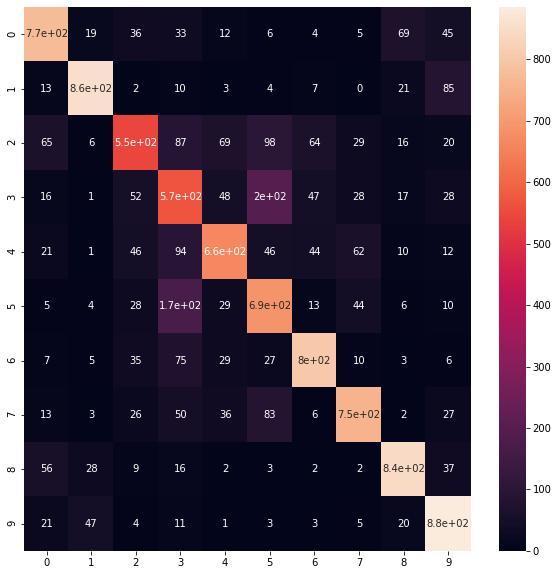

In [51]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

In [ ]:
###### jupyter notebookta save_model yapmak

#import os
#directory = os.path.join(os.getcwd(),'saved_models')
#if not os.path.isdir(directory):
#   os.makedirs(directory)
#model.path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
#cnn_model.save(model_path)

In [ ]:
## Rotating images and extending the data
#from keras.preprocessing_image import ImageDataGenerator
#dataget_train = ImageDataGenerator(rotation_range = 90)
#dataget_train.fit(x_train_sample)


#from scipy.misc import toimage
#fig = plt.figure(figsize = (20,2))
#for x_batch in dataget_train.flow(x_train_sample, batch_size = n):
    #for i in range(0,n):
      # ax= fig.add_subplot(1,n,i+1)
      # ax.imshow(toimage(x_batch[i]))
    #fig.subtitle('Augmented images (rotated 90 degrees)')
    #plt.show()
    #break;

In [ ]:
## 2.dataya  foto koyma augmentation

#from keras.preprocessing_image import ImageDataGenerator

#### datagen = ImageDataGenerator(rotation_range = 90, width_shift_range= 0.1, horizontal_flip = True, vertical_flip = True)
#datagen.fit(x_train)
#cnn_model.fit_generator(datagen.flow(x_train, y_train, batch_size = 32, epochs= 2))
#
 
#
